# Assignment #5 - Deep Learning

### <font color="red"> DUE: Apr 16 (Monday) 11:00 pm </font>  

Rohini Isarapu


# I. Overview

The objective of this assignment is to use Tensor flow and implement different neural network structures against our dataset.Conclusion can be drawn based upon which neural structure best fits are dataset.

In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from pandas.tools import plotting
import matplotlib.pyplot as plt
from IPython.core.debugger import Tracer
from copy import deepcopy as copy 
%matplotlib inline

# II. Data

The dataset “Deaths in United States” consists of a CSV file with 30 features and about 27 lakh rows. It consists of all the deaths which occurred in the year 2015 across United States with a precise information about the details of the death and statistical background of the departed. We can analyze the circumstances and how the death in U.S is different from other countries. The death reports are accurate as it is released by CDC (Centers for disease control and prevention) under the National Vital Statistics System.

Some of the important columns include:

• Month_of_death

• Sex

• Place of death

• Marital Status

• Manner of death

• Method of Disposition

The attribute values consist of numeric as well as strings. 

In [36]:
UsDeaths = pd.read_csv("C:/Users/isara/Documents/2015_data.csv",nrows = 1000)

In [37]:
new_UsDeaths_Data=UsDeaths.drop(['education_1989_revision','education_2003_revision','education_reporting_flag','detail_age_type',
                       'age_substitution_flag','age_recode_52','age_recode_27','infant_age_recode_22','current_data_year','activity_code',
                       'icd_code_10th_revision','358_cause_recode','113_cause_recode','130_infant_cause_recode','39_cause_recode',
                       'number_of_entity_axis_conditions','entity_condition_1','entity_condition_2','entity_condition_3','entity_condition_4',
                       'entity_condition_5','entity_condition_6','entity_condition_7','entity_condition_8','entity_condition_9','entity_condition_10',
            'entity_condition_11','entity_condition_12','entity_condition_13','entity_condition_14','entity_condition_15','entity_condition_16','entity_condition_17','entity_condition_18',
                       'entity_condition_19','entity_condition_20','number_of_record_axis_conditions','record_condition_1',
                       'record_condition_2','record_condition_3','record_condition_4','record_condition_5','record_condition_6',
                       'record_condition_7','record_condition_8','record_condition_9','record_condition_10','record_condition_11','record_condition_12','record_condition_13',
                       'record_condition_14','record_condition_15','record_condition_16','record_condition_17','record_condition_18','record_condition_19',
                       'record_condition_20','race','bridged_race_flag','race_imputation_flag','race_recode_3','hispanic_origin','place_of_injury_for_causes_w00_y34_except_y06_and_y07_'],axis=1)

new_UsDeaths_Data = new_UsDeaths_Data[new_UsDeaths_Data.detail_age < 100][new_UsDeaths_Data.day_of_week_of_death< 8]
print(new_UsDeaths_Data)

     resident_status  month_of_death sex  detail_age  age_recode_12  \
0                  1               1   M          84             10   
1                  1               1   M          70              9   
2                  1               1   F          91             11   
3                  1               1   F          40              6   
4                  1               1   F          89             11   
5                  1               1   M          78             10   
6                  1               1   M          92             11   
7                  1               1   M          82             10   
8                  1               1   F          89             11   
9                  1               1   F          93             11   
10                 1               1   F          84             10   
11                 1               1   F          84             10   
12                 1               1   F          67              9   
13    

C:\Users\isara\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


In [38]:
nans=new_UsDeaths_Data.isnull().any()
nans

resident_status                        False
month_of_death                         False
sex                                    False
detail_age                             False
age_recode_12                          False
place_of_death_and_decedents_status    False
marital_status                         False
day_of_week_of_death                   False
injury_at_work                         False
manner_of_death                        False
method_of_disposition                  False
autopsy                                False
race_recode_5                          False
hispanic_originrace_recode             False
dtype: bool

[Text(0,0,'1'), Text(0,0,'2'), Text(0,0,'3'), Text(0,0,'5'), Text(0,0,'7')]

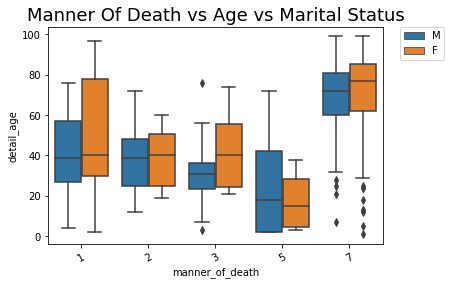

In [39]:
plt.title('Manner Of Death vs Age vs Marital Status', fontsize=18)
ax=sns.boxplot(x="manner_of_death",y="detail_age",hue="sex",data=new_UsDeaths_Data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [40]:
new_UsDeaths_Data.sex=new_UsDeaths_Data.sex.replace({'M':0,'F':1})

In [41]:
print(new_UsDeaths_Data)

     resident_status  month_of_death  sex  detail_age  age_recode_12  \
0                  1               1    0          84             10   
1                  1               1    0          70              9   
2                  1               1    1          91             11   
3                  1               1    1          40              6   
4                  1               1    1          89             11   
5                  1               1    0          78             10   
6                  1               1    0          92             11   
7                  1               1    0          82             10   
8                  1               1    1          89             11   
9                  1               1    1          93             11   
10                 1               1    1          84             10   
11                 1               1    1          84             10   
12                 1               1    1          67           

In [42]:
new_UsDeaths_Data['sex']=new_UsDeaths_Data['sex'].astype(np.int64)

In [43]:
new_UsDeaths_Data['manner_of_death']=new_UsDeaths_Data['manner_of_death'].fillna(0)

In [44]:
new_UsDeaths_Data['manner_of_death']=new_UsDeaths_Data['manner_of_death'].astype(np.int64)

In [45]:
from sklearn import preprocessing
Features = ["manner_of_death","detail_age","race_recode_5","hispanic_originrace_recode","day_of_week_of_death","place_of_death_and_decedents_status","resident_status","month_of_death","age_recode_12"]
new_UsDeaths_DataShuffle = new_UsDeaths_Data.iloc[np.random.permutation(len(new_UsDeaths_Data))]


# III. Methods

I implemented three kinds of neural networks with 6 hidden layers . I have used the relu activation function for the first three hidden layers and sigmoid activation fucntion for the next three hidden layers. The selected combination of activation fuctions where giving better results. 

Experimental Code:

For the experimental code, I have taken two nodes which is a constant and the data type is float. The two nodes are added in the to a new node op_add in the session.

First DNN:

The input features are standardized between 0 and 1. In the first feed forward network I have taken 6 hidden layers and the number of nodes in the hidden layers is as follows 10,20,30,40,50,60. I chose this structure as I wanted to see how the network works when the number of nodes expand from one hidden layer to another layer. The one hot encoder function  adds extra columns based on the number of labels present for categorical values. Then we divide the dataset into training and test subset by using train_test_split() sklearn library. Then I define my parameters i.e learning rate, training epochs ,Cost History(Cost Value for each epoch), Weight and bias. I have taken the learning rate to be 0.1 with 100 epochs as it was giving me a better accuracy results. The placeholders now take the input from the dataset. The global_variable_initializer() to initialize all the variables. The train.Saver() saves our model.I calculated the cost error by using mse.For each epoch, the cost is calculated and the weights are changed to minimize the error. The accuracy of the model is calculated on the Test subset.

Second DNN:

The secon DNN is same as First DNN except for the structure of the NeuralNet. I have taken 6 hidden layers and the number of nodes in the hidden layer is as follows 60,50,40,30,20,10. I chose this structure as I wanted to see how the network works when the number of nodes shrink from one hidden layer to another layer.

Third DNN:

I have taken 6 hidden layers and the number of nodes in the hidden layer is as follows 60,30,60,30,60,30. I chose this structure just out of curiosity.






In [46]:
import tensorflow as tf

node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly

with tf.Session() as sess:
    op_add = tf.add(node1, node2)
    print(op_add)
    print(sess.run(op_add))

Tensor("Add_50:0", shape=(), dtype=float32)
7.0


C:\Users\isara\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


n_dim 9
epoch :  0  -  cost:  0.768795  - MSE:  5.73648375697 - Train Accuracy:  0.441509
epoch :  1  -  cost:  0.78974  - MSE:  5.61792151477 - Train Accuracy:  0.553459
epoch :  2  -  cost:  0.81253  - MSE:  5.89337048293 - Train Accuracy:  0.451572
epoch :  3  -  cost:  0.852782  - MSE:  5.73045597366 - Train Accuracy:  0.558491
epoch :  4  -  cost:  0.863781  - MSE:  6.05978892611 - Train Accuracy:  0.447799
epoch :  5  -  cost:  0.898134  - MSE:  5.8399444127 - Train Accuracy:  0.561006
epoch :  6  -  cost:  0.872314  - MSE:  6.10659813452 - Train Accuracy:  0.447799
epoch :  7  -  cost:  0.892114  - MSE:  5.85940468249 - Train Accuracy:  0.561006
epoch :  8  -  cost:  0.856205  - MSE:  6.08920263233 - Train Accuracy:  0.45283
epoch :  9  -  cost:  0.865699  - MSE:  5.84227476978 - Train Accuracy:  0.561006
epoch :  10  -  cost:  0.830573  - MSE:  6.03742644741 - Train Accuracy:  0.464151
epoch :  11  -  cost:  0.835198  - MSE:  5.81136595263 - Train Accuracy:  0.561006
epoch :  1

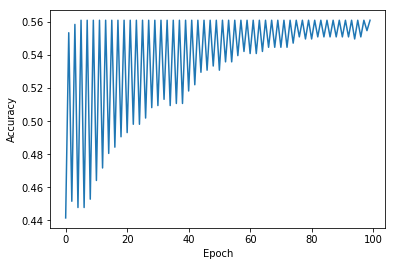

Test Accuracy:  0.572864
MSE: 5.5107


In [47]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

X = new_UsDeaths_DataShuffle.loc[:,Features].as_matrix()
y = new_UsDeaths_DataShuffle.loc[:,'sex']
X = preprocessing.MinMaxScaler().fit_transform(X)
original_X = X
original_y = y

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y)

X, Y = shuffle(X, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=415)
 
learning_rate = 0.1
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2

n_hidden_1 = 10
n_hidden_2 = 20
n_hidden_3 = 30
n_hidden_4 = 40
n_hidden_5 = 50
n_hidden_6 = 60
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
def deep_learning(x, weights, biases):
 
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.sigmoid(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.sigmoid(layer_6)
    
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return out_layer
  
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 

init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
y = deep_learning(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)
#Accuracy Graph
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
 
#Final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
 
#Final mean square error
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

C:\Users\isara\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(795, 9)
(795, 2)
(199, 9)
n_dim 9
epoch :  0  -  cost:  1.15086  - MSE:  4.56975430175 - Train Accuracy:  0.561006
epoch :  1  -  cost:  0.975866  - MSE:  3.60424943664 - Train Accuracy:  0.561006
epoch :  2  -  cost:  0.856422  - MSE:  3.04011622986 - Train Accuracy:  0.561006
epoch :  3  -  cost:  0.777021  - MSE:  2.6492402535 - Train Accuracy:  0.561006
epoch :  4  -  cost:  0.729685  - MSE:  2.37719125744 - Train Accuracy:  0.561006
epoch :  5  -  cost:  0.704843  - MSE:  2.23548746231 - Train Accuracy:  0.561006
epoch :  6  -  cost:  0.691355  - MSE:  2.15399203228 - Train Accuracy:  0.561006
epoch :  7  -  cost:  0.683959  - MSE:  2.10004342982 - Train Accuracy:  0.561006
epoch :  8  -  cost:  0.679729  - MSE:  2.06134421424 - Train Accuracy:  0.562264
epoch :  9  -  cost:  0.677398  - MSE:  2.03654921909 - Train Accuracy:  0.561006
epoch :  10  -  cost:  0.676055  - MSE:  2.02765555511 - Train Accuracy:  0.561006
epoch :  11  -  cost:  0.675165  - MSE:  2.02589253437 - Train A

epoch :  99  -  cost:  0.661693  - MSE:  2.1011126975 - Train Accuracy:  0.573585


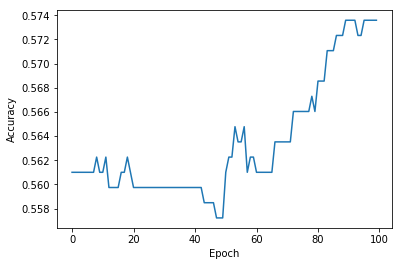

Test Accuracy:  0.577889
MSE: 2.1011


In [49]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

X = new_UsDeaths_DataShuffle.loc[:,Features].as_matrix()
y = new_UsDeaths_DataShuffle.loc[:,'sex']
X = preprocessing.MinMaxScaler().fit_transform(X)
original_X = X
original_y = y

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y)

X, Y = shuffle(X, Y, random_state=1)
 
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=415)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
 
learning_rate = 0.1
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2

n_hidden_1 = 60
n_hidden_2 = 50
n_hidden_3 = 40
n_hidden_4 = 30
n_hidden_5 = 20
n_hidden_6 = 10
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
def deep_learning(x, weights, biases):
 
    # Hidden layer with RELU activationsd
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    # Hidden layer with sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    # Hidden layer with sigmoid activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    # Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.sigmoid(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.sigmoid(layer_6)
    
    # Output layer with linear activation
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return out_layer
 
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 
init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
y = deep_learning(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)
 
 
#Plot Accuracy Graph
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
 
#final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
 
#mean square error
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

C:\Users\isara\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(795, 9)
(795, 2)
(199, 9)
n_dim 9
epoch :  0  -  cost:  2.50621  - MSE:  8.25218665885 - Train Accuracy:  0.561006
epoch :  1  -  cost:  1.36388  - MSE:  2.46188845224 - Train Accuracy:  0.561006
epoch :  2  -  cost:  0.782644  - MSE:  0.718340253455 - Train Accuracy:  0.525786
epoch :  3  -  cost:  0.739671  - MSE:  0.609135415237 - Train Accuracy:  0.509434
epoch :  4  -  cost:  0.733629  - MSE:  0.587076203745 - Train Accuracy:  0.514465
epoch :  5  -  cost:  0.728992  - MSE:  0.578346241938 - Train Accuracy:  0.504403
epoch :  6  -  cost:  0.724903  - MSE:  0.570755823799 - Train Accuracy:  0.520755
epoch :  7  -  cost:  0.720005  - MSE:  0.561319656559 - Train Accuracy:  0.524528
epoch :  8  -  cost:  0.714133  - MSE:  0.553471711626 - Train Accuracy:  0.533333
epoch :  9  -  cost:  0.708546  - MSE:  0.548669008322 - Train Accuracy:  0.537107
epoch :  10  -  cost:  0.705998  - MSE:  0.547409793527 - Train Accuracy:  0.535849
epoch :  11  -  cost:  0.704926  - MSE:  0.539364035574

epoch :  98  -  cost:  0.65203  - MSE:  0.528571160381 - Train Accuracy:  0.605031
epoch :  99  -  cost:  0.649203  - MSE:  0.527147507403 - Train Accuracy:  0.615094


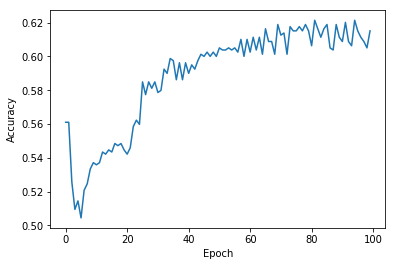

Test Accuracy:  0.482412
MSE: 0.5271


In [48]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode


X = new_UsDeaths_DataShuffle.loc[:,Features].as_matrix()
y = new_UsDeaths_DataShuffle.loc[:,'sex']
X = preprocessing.MinMaxScaler().fit_transform(X)
original_X = X
original_y = y

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y)


X, Y = shuffle(X, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=415)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

learning_rate = 0.1
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2

n_hidden_1 = 60
n_hidden_2 = 30
n_hidden_3 = 60
n_hidden_4 = 30
n_hidden_5 = 60
n_hidden_6 = 30
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
def deep_learning(x, weights, biases):
 
    # Hidden layer with RELU activationsd
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    # Hidden layer with sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    # Hidden layer with sigmoid activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    # Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.sigmoid(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.sigmoid(layer_6)
    
    # Output layer with linear activation
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return out_layer
 
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 
init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
y = deep_learning(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)
 
 
#Plot Accuracy Graph
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
 
#final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
 
#mean square error
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

# IV - Results

First DNN: The Test Accuracy is 0.572864 and MSE is 5.5107

Second DNN: The Test Accuracy is 0.577889 and MSE is 2.1011

Third DNN: The Test Accuracy is 0.482412 and MSE is 0.5271

The accuracy and mse is changing every time I run.

The first DNN and second DNN is better when compared to the third DNN most of the time.

# Conclusions

This assigment gave the basic idea about how to use tensorflow. Intially, it was very confusing but as i went through resources and tried the assignment it was intersting. Edureka blog for was very informative.

Citation: https://www.edureka.co/blog/perceptron-learning-algorithm/

# Extra Credit

- Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources. 

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| Includes description of your data
 | 5| Plots to visualize data 
 | 5| Reading and analyzing the plots 
50 | Methods | 
 | 30| Explanation of the choice for 3 different neural network structures and reason for the selection. (10 points for each) 
 |   | Relate the choice of your data!
 | 15| Explanation of codes for each structure
 |  5| Explanation of experimental codes
25 | Results | Your Data
| 15| plots for results 
| 10| Discussions about the choice of network structures 
5 | Conclusions 
